In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the CSV into a DataFrame
census_data = pd.read_csv('/content/preprocessed_data (2).csv')

# Save the processed data
census_data.to_csv('preprocessed_data.csv', index=False)
census_data

,Month,G&A beds available,G&A core beds available,G&A escalation beds available,G&A beds occupied,7 or more days,14 or more days,21 or more days,7 or more days.1,14 or more days.1,21 or more days.1,G&A occupancy rate
0,March 2020,95804.903226,NaN,NaN,78667.258065,37907.0,22716.0,14753.0,0.481865,0.288761,0.187537,0.821119
1,April 2020,90553.900000,NaN,NaN,52997.700000,21177.0,11035.0,6695.0,0.399583,0.208217,0.126326,0.585261
2,May 2020,89384.677419,NaN,NaN,58407.677419,23145.0,11786.0,6836.0,0.396266,0.201789,0.117039,0.653442
3,June 2020,88952.000000,NaN,NaN,64589.000000,25788.0,13314.0,7767.0,0.399263,0.206134,0.120253,0.726111
4,July 2020,89690.000000,NaN,NaN,68197.000000,27453.0,13981.0,8055.0,0.402554,0.205009,0.118114,0.760363
5,August 2020,89827.000000,NaN,NaN,72610.000000,30118.0,15600.0,8974.0,0.414791,0.214846,0.123592,0.808332
6,September 2020,90233.000000,NaN,NaN,76541.000000,33294.0,17567.0,10333.0,0.434983,0.229511,0.135000,0.848260
7,October 2020,91002.000000,NaN,NaN,77889.000000,34173.0,18159.0,10750.0,0.438740,0.233139,0.138017,0.855904
8,November 2020,88917.000000,NaN,NaN,77696.000000,34718.0,18814.0,11270.0,0.446844,0.242149,0.145053,0.873804
9,December 2020,89140.000000,NaN,NaN,77515.000000,35552.0,19223.0,11415.0,0.458647,0.247991,0.147262,0.869587


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'residual_block_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'residual_block_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'residual_block_3', however the 

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - loss: 1.5062 - val_loss: 2.2232
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - loss: 1.1551 - val_loss: 2.4146
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 1.7555 - val_loss: 2.4959
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 1.2571 - val_loss: 1.2651
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - loss: 0.4703 - val_loss: 1.3009
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.7147 - val_loss: 1.2695
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.6330 - val_loss: 1.0638
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 0.2971 - val_loss: 1.0777
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - loss: 0.3671 - val_loss: 1.0950
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 0.3773 - val_loss: 1.0408
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.3661 - val_loss: 0.9242
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.21

<Figure size 1400x700 with 0 Axes>

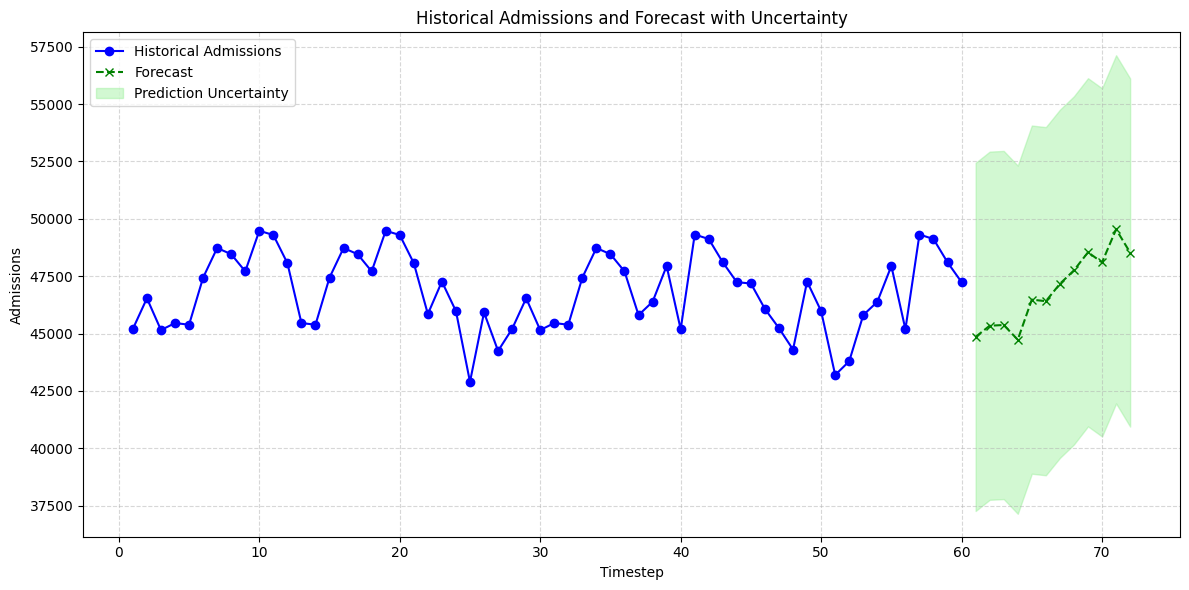

In [3]:
# Calculate Discharges & Admissions
census_data["Discharges"] = census_data["G&A beds occupied"] - census_data["7 or more days"]
census_data["Admissions"] = census_data["G&A beds occupied"].shift(-1) - census_data["Discharges"]
census_data.dropna(subset=["Admissions"], inplace=True)

# Create Features
census_data['length_of_stay'] = (
    7 * census_data['7 or more days'] +
    14 * census_data['14 or more days'] +
    21 * census_data['21 or more days']
) / census_data['Admissions']
census_data['length_of_stay'] = census_data['length_of_stay'].fillna(0).clip(lower=0)

df = pd.DataFrame({
    'occupancy_rate': census_data['G&A occupancy rate'].values,
    'length_of_stay': census_data['length_of_stay'].values,
    'beds_available': census_data['G&A beds available'].values,
    'admissions': census_data['Admissions'].values
})

# Hyperparameters
lookback = 12
horizon = 12
input_dim = 3
hidden_size = 256
num_encoder_layers = 3
num_decoder_layers = 3
learning_rate = 0.001
batch_size = 32
epochs = 100

# 2. Prepare Sequences
data = df[['occupancy_rate', 'length_of_stay', 'beds_available', 'admissions']].values
feat_mean = data.mean(axis=0)
feat_std = data.std(axis=0)
scaled_data = (data - feat_mean) / feat_std

X_list, Cov_list, Y_list = [], [], []
num_samples = len(scaled_data)
for i in range(num_samples - lookback - horizon):
    past_inputs = scaled_data[i:i+lookback, 0:3]
    cov_window = scaled_data[i:i+lookback+horizon, 0:3]
    future_targets = scaled_data[i+lookback:i+lookback+horizon, 3]
    X_list.append(past_inputs)
    Cov_list.append(cov_window)
    Y_list.append(future_targets)

X = np.array(X_list)
Cov = np.array(Cov_list)
Y = np.array(Y_list)

X_train, X_temp, Cov_train, Cov_temp, Y_train, Y_temp = train_test_split(X, Cov, Y, test_size=0.3, random_state=42)
X_val, X_test, Cov_val, Cov_test, Y_val, Y_test = train_test_split(X_temp, Cov_temp, Y_temp, test_size=0.5, random_state=42)

class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, hidden_size, dropout_rate=0.1):
        super(ResidualBlock, self).__init__()
        self.hidden_size = hidden_size
        self.dense_relu = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.dense_linear = tf.keras.layers.Dense(hidden_size)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.input_projection = tf.keras.layers.Dense(hidden_size)

    def call(self, inputs):
        if inputs.shape[-1] != self.hidden_size:
            inputs = self.input_projection(inputs)
        x = self.dense_relu(inputs)
        x = self.dropout(x)
        x = self.dense_linear(x)
        return self.layer_norm(inputs + x)

# 3. Build TiDE Model
inputs = tf.keras.Input(shape=(lookback, input_dim), name='historical_inputs')
covariates = tf.keras.Input(shape=(lookback + horizon, input_dim), name='covariates')

projected_covariates = tf.keras.layers.Dense(hidden_size, activation='relu')(covariates)
flattened_inputs = tf.keras.layers.Flatten()(inputs)
sliced_covariates = tf.keras.layers.Lambda(lambda x: x[:, :lookback, :])(projected_covariates)
flattened_past_covariates = tf.keras.layers.Flatten()(sliced_covariates)
combined_inputs = tf.keras.layers.Concatenate(axis=-1)([flattened_inputs, flattened_past_covariates])

# Encoder
encoding = combined_inputs
for _ in range(num_encoder_layers):
    encoding = ResidualBlock(hidden_size)(encoding)

# Decoder
for _ in range(num_decoder_layers):
    encoding = ResidualBlock(hidden_size)(encoding)

# Reshape for horizon
decoded = tf.keras.layers.Dense(horizon * hidden_size)(encoding)
decoded = tf.keras.layers.Reshape((horizon, hidden_size))(decoded)

# Temporal Decoder
outputs = []
future_covariate_projection = tf.keras.layers.Dense(hidden_size)
for t in range(horizon):
    future_covariate = future_covariate_projection(projected_covariates[:, lookback + t, :])
    highway_input = tf.keras.layers.Concatenate(axis=-1)([decoded[:, t], future_covariate])
    single_output = tf.keras.layers.Dense(1)(highway_input)
    outputs.append(single_output)

outputs = tf.keras.layers.Concatenate(axis=-1)(outputs)
global_residual = tf.keras.layers.Dense(horizon)(flattened_inputs)
final_output = outputs + global_residual

model = tf.keras.Model(inputs=[inputs, covariates], outputs=final_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train TiDE Model
history = model.fit(
    [X_train, Cov_train], Y_train,
    validation_data=([X_val, Cov_val], Y_val),
    epochs=epochs,
    batch_size=batch_size
)

# 4. Conformal Prediction
residuals = Y_val - model.predict([X_val, Cov_val])
conformity_quantile = np.quantile(np.abs(residuals), 0.9)  # 90% coverage

# 5. Predictions with Intervals
forecast = model.predict([X_test, Cov_test])
lower_pred = forecast - conformity_quantile
upper_pred = forecast + conformity_quantile

# Debugging scaling factors and predictions
print("Feature Mean (admissions):", feat_mean[3])
print("Feature Std (admissions):", feat_std[3])

# Rescaling the values to the original scale
forecast_original = forecast * feat_std[3] + feat_mean[3]
lower_pred_original = lower_pred * feat_std[3] + feat_mean[3]
upper_pred_original = upper_pred * feat_std[3] + feat_mean[3]
historical_admissions = Y_test * feat_std[3] + feat_mean[3]

# Combine historical admissions for full plotting
historical_timestamps = np.arange(len(historical_admissions))  # Historical data length
forecast_timestamps = np.arange(len(historical_admissions), len(historical_admissions) + horizon)

# Access horizon values
lower_pred_horizon = lower_pred_original[0, :]  # Prediction intervals
upper_pred_horizon = upper_pred_original[0, :]
forecast_horizon = forecast_original[0, :]

# Debug print for verification
print("Historical Admissions (original scale):", historical_admissions.flatten())
print("Forecast (original scale):", forecast_horizon)
print("Lower Bound (original scale):", lower_pred_horizon)
print("Upper Bound (original scale):", upper_pred_horizon)

# Plot all historical admissions and the forecasted predictions
plt.figure(figsize=(14, 7))

# Correct the historical timestamps to match the full historical admissions
historical_timestamps = np.arange(len(historical_admissions))  # Full historical data length

# Correct the forecast timestamps
forecast_timestamps = np.arange(len(historical_admissions), len(historical_admissions) + len(forecast_original))
import matplotlib.pyplot as plt
import numpy as np

# Historical and forecast data (use your actual values)
historical_admissions = historical_admissions.flatten()  # Ensure it's 1D
forecast_horizon = forecast_horizon.flatten()  # Ensure it's 1D
lower_pred_horizon = lower_pred_horizon.flatten()  # Ensure it's 1D
upper_pred_horizon = upper_pred_horizon.flatten()  # Ensure it's 1D

# Create timesteps dynamically
total_length = len(historical_admissions) + len(forecast_horizon)
timesteps = np.arange(1, total_length + 1)

# Split timesteps for historical and forecast
historical_time = timesteps[:len(historical_admissions)]
forecast_time = timesteps[len(historical_admissions):]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(historical_time, historical_admissions, label="Historical Admissions", color="blue", linestyle="-", marker="o")
plt.plot(forecast_time, forecast_horizon, label="Forecast", color="green", linestyle="--", marker="x")

# Uncertainty bounds
plt.fill_between(forecast_time, lower_pred_horizon, upper_pred_horizon, color="lightgreen", alpha=0.4, label="Prediction Uncertainty")

# Add labels, legend, and grid
plt.xlabel("Timestep")
plt.ylabel("Admissions")
plt.title("Historical Admissions and Forecast with Uncertainty")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

# Show plot
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Generate integer labels for historical and forecast data
historical_labels = list(range(1, len(historical_admissions) + 1))
forecast_labels = list(range(len(historical_admissions) + 1, len(historical_admissions) + len(forecast_horizon) + 1))

# Combine labels, admissions, and prediction intervals
all_labels = historical_labels + forecast_labels
all_admissions = list(historical_admissions) + list(forecast_horizon)
all_lower_bounds = [None] * len(historical_admissions) + list(lower_pred_horizon)
all_upper_bounds = [None] * len(historical_admissions) + list(upper_pred_horizon)

# Create DataFrame
admissions_df = pd.DataFrame({
    'Timestep': all_labels,
    'Admissions': all_admissions,
    'Lower_Bound': all_lower_bounds,
    'Upper_Bound': all_upper_bounds
})

# Save to CSV
csv_file_path = 'admissions_forecast_with_timesteps.csv'
admissions_df.to_csv(csv_file_path, index=False)

print(f"Admissions forecast saved to {csv_file_path}.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'residual_block_7', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'residual_block_8', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'residual_block_9', however the 

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - loss: 1.6903 - val_loss: 2.4589
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 2.0174 - val_loss: 1.1198
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 0.8666 - val_loss: 0.7073
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 0.7031 - val_loss: 0.4361
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - loss: 0.3581 - val_loss: 0.7083
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - loss: 0.4371 - val_loss: 0.5526
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - loss: 0.3274 - val_loss: 0.4045
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - loss: 0.2727 - val_loss: 0.3820
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.2940 - val_loss: 0.3855
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.3026 - val_loss: 0.2853
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.2074 - val_loss: 0.2892
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 0.2002 - val_los

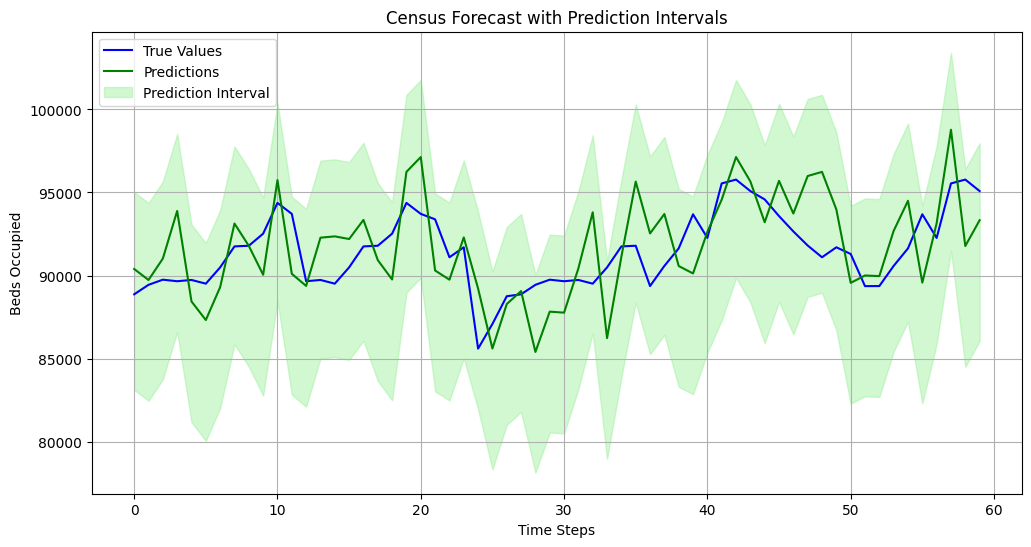

Census forecast saved to census_forecast_with_timesteps.csv.


In [4]:

# Ensure correct extraction of G&A beds occupied
census_data = census_data.dropna(subset=["G&A beds occupied"])
census_data['LOS'] = (
    7 * census_data['7 or more days'] +
    14 * census_data['14 or more days'] +
    21 * census_data['21 or more days']
) / census_data['G&A beds occupied']
census_data['LOS'] = census_data['LOS'].fillna(0).clip(lower=0)

# Use correct historical data
historical_beds_occupied_data = census_data['G&A beds occupied'].values

# Prepare DataFrame for model
df = pd.DataFrame({
    'LOS': census_data['LOS'].values,
    'beds_available': census_data['G&A beds available'].values,
    'beds_occupied': historical_beds_occupied_data
})

# Hyperparameters
lookback = 12
horizon = 12
input_dim = 2  # Features: LOS and beds_available
hidden_size = 256
num_encoder_layers = 3
num_decoder_layers = 3
learning_rate = 0.001
batch_size = 32
epochs = 50

# Prepare Sequences
data = df[['LOS', 'beds_available', 'beds_occupied']].values
feat_mean = data.mean(axis=0)
feat_std = data.std(axis=0)
scaled_data = (data - feat_mean) / feat_std

X_list, Cov_list, Y_list = [], [], []
num_samples = len(scaled_data)
for i in range(num_samples - lookback - horizon):
    past_inputs = scaled_data[i:i+lookback, 0:2]
    cov_window = scaled_data[i:i+lookback+horizon, 0:2]
    future_targets = scaled_data[i+lookback:i+lookback+horizon, 2]
    X_list.append(past_inputs)
    Cov_list.append(cov_window)
    Y_list.append(future_targets)

X = np.array(X_list)
Cov = np.array(Cov_list)
Y = np.array(Y_list)

X_train, X_temp, Cov_train, Cov_temp, Y_train, Y_temp = train_test_split(X, Cov, Y, test_size=0.3, random_state=42)
X_val, X_test, Cov_val, Cov_test, Y_val, Y_test = train_test_split(X_temp, Cov_temp, Y_temp, test_size=0.5, random_state=42)


class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, hidden_size, dropout_rate=0.1):
        super(ResidualBlock, self).__init__()
        self.hidden_size = hidden_size
        self.dense_relu = tf.keras.layers.Dense(hidden_size, activation='relu')
        self.dense_linear = tf.keras.layers.Dense(hidden_size)
        self.layer_norm = tf.keras.layers.LayerNormalization()
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.input_projection = tf.keras.layers.Dense(hidden_size)

    def call(self, inputs):
        if inputs.shape[-1] != self.hidden_size:
            inputs = self.input_projection(inputs)
        x = self.dense_relu(inputs)
        x = self.dropout(x)
        x = self.dense_linear(x)
        return self.layer_norm(inputs + x)

# 3. Build TiDE Model
inputs = tf.keras.Input(shape=(lookback, input_dim), name='historical_inputs')
covariates = tf.keras.Input(shape=(lookback + horizon, input_dim), name='covariates')

projected_covariates = tf.keras.layers.Dense(hidden_size, activation='relu')(covariates)
flattened_inputs = tf.keras.layers.Flatten()(inputs)
sliced_covariates = tf.keras.layers.Lambda(lambda x: x[:, :lookback, :])(projected_covariates)
flattened_past_covariates = tf.keras.layers.Flatten()(sliced_covariates)
combined_inputs = tf.keras.layers.Concatenate(axis=-1)([flattened_inputs, flattened_past_covariates])

# Encoder
encoding = combined_inputs
for _ in range(num_encoder_layers):
    encoding = ResidualBlock(hidden_size)(encoding)

# Decoder
for _ in range(num_decoder_layers):
    encoding = ResidualBlock(hidden_size)(encoding)

# Reshape for horizon
decoded = tf.keras.layers.Dense(horizon * hidden_size)(encoding)
decoded = tf.keras.layers.Reshape((horizon, hidden_size))(decoded)

# Temporal Decoder
outputs = []
future_covariate_projection = tf.keras.layers.Dense(hidden_size)
for t in range(horizon):
    future_covariate = future_covariate_projection(projected_covariates[:, lookback + t, :])
    highway_input = tf.keras.layers.Concatenate(axis=-1)([decoded[:, t], future_covariate])
    single_output = tf.keras.layers.Dense(1)(highway_input)
    outputs.append(single_output)

outputs = tf.keras.layers.Concatenate(axis=-1)(outputs)
global_residual = tf.keras.layers.Dense(horizon)(flattened_inputs)
final_output = outputs + global_residual

model = tf.keras.Model(inputs=[inputs, covariates], outputs=final_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train TiDE Model
history = model.fit(
    [X_train, Cov_train], Y_train,
    validation_data=([X_val, Cov_val], Y_val),
    epochs=epochs,
    batch_size=batch_size
)

# CQR - Conformal Quantile Regression
residuals = Y_val - model.predict([X_val, Cov_val])  # Residuals
conformity_quantile_lower = np.quantile(residuals, 0.05)  # 5% quantile
conformity_quantile_upper = np.quantile(residuals, 0.95)  # 95% quantile

# Predictions with Intervals
forecast = model.predict([X_test, Cov_test])
lower_pred = forecast + conformity_quantile_lower
upper_pred = forecast + conformity_quantile_upper

# Rescale predictions to original scale
forecast_original = forecast * feat_std[2] + feat_mean[2]
lower_pred_original = lower_pred * feat_std[2] + feat_mean[2]
upper_pred_original = upper_pred * feat_std[2] + feat_mean[2]
historical_beds_occupied = Y_test * feat_std[2] + feat_mean[2]

# Plot Predictions and Intervals
plt.figure(figsize=(12, 6))
plt.plot(historical_beds_occupied.flatten(), label="True Values", color="blue")
plt.plot(forecast_original.flatten(), label="Predictions", color="green")
plt.fill_between(
    range(len(forecast_original.flatten())),
    lower_pred_original.flatten(),
    upper_pred_original.flatten(),
    color="lightgreen",
    alpha=0.4,
    label="Prediction Interval"
)
plt.xlabel("Time Steps")
plt.ylabel("Beds Occupied")
plt.title("Census Forecast with Prediction Intervals")
plt.legend()
plt.grid()
plt.show()
import pandas as pd
census = {
    'forecast': forecast_original.flatten(),
    'lower_bound': lower_pred_original.flatten(),
    'upper_bound': upper_pred_original.flatten()
}
# Generate integer labels for timesteps
forecast_length = len(census['forecast'])
timesteps = list(range(1, forecast_length + 1))

# Create a DataFrame for the census data
census_df = pd.DataFrame({
    'Timestep': timesteps,
    'Forecast': census['forecast'],
    'Lower_Bound': census['lower_bound'],
    'Upper_Bound': census['upper_bound']
})

# Save the DataFrame to a CSV file
csv_file_path = 'census_forecast_with_timesteps.csv'
census_df.to_csv(csv_file_path, index=False)

print(f"Census forecast saved to {csv_file_path}.")


Data Description:
       beds_available  beds_occupied    LOS_7_plus
count       56.000000      56.000000     56.000000
mean     95507.330012   85806.975634  41598.714286
std       3909.289853    9304.663842   7093.421630
min      88917.000000   52997.700000  21177.000000
25%      91669.250000   80255.500000  36128.500000
50%      96525.000000   89474.500000  45188.500000
75%      98793.000000   91887.500000  46623.750000
max     101642.000000   95776.000000  49956.000000
Feature Mean: [95507.33001152 85806.97563364 41598.71428571]
Feature Std Dev: [3874.22824947 9221.21225591 7029.80221403]
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 1.0460 - val_loss: 1.1061
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.8576 - val_loss: 0.8698
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.5679 - val_loss: 0.9253
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.4958 - val_loss: 0.5379
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2482 - v

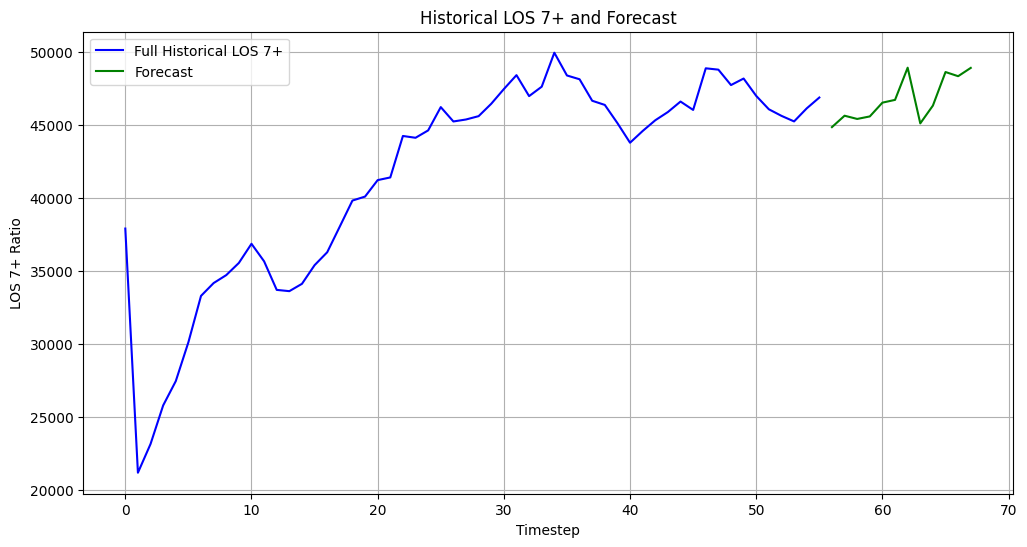

Data saved to los7.csv.


In [5]:
# Ensure correct extraction of LOS (7 or more days)
census_data = census_data.dropna(subset=["7 or more days"])
census_data['LOS_7_plus'] = census_data['7 or more days']

# Use correct historical data
historical_los_7_plus_data = census_data['LOS_7_plus'].values

# Prepare DataFrame for model
df = pd.DataFrame({
    'beds_available': census_data['G&A beds available'].values,
    'beds_occupied': census_data['G&A beds occupied'].values,
    'LOS_7_plus': census_data['LOS_7_plus'].values
})

# Debug: Check data distributions
print("Data Description:")
print(df.describe())

# Hyperparameters
lookback = 12
horizon = 12
input_dim = 2  # Features: beds_available and beds_occupied
hidden_size = 256
num_encoder_layers = 3
num_decoder_layers = 3
learning_rate = 0.001
batch_size = 32
epochs = 50

# Prepare Sequences
data = df[['beds_available', 'beds_occupied', 'LOS_7_plus']].values
feat_mean = data.mean(axis=0)
feat_std = data.std(axis=0)
scaled_data = (data - feat_mean) / feat_std

# Debug: Check scaling factors
print("Feature Mean:", feat_mean)
print("Feature Std Dev:", feat_std)

X_list, Cov_list, Y_list = [], [], []
num_samples = len(scaled_data)
for i in range(num_samples - lookback - horizon):
    past_inputs = scaled_data[i:i+lookback, 0:2]
    cov_window = scaled_data[i:i+lookback+horizon, 0:2]
    future_targets = scaled_data[i+lookback:i+lookback+horizon, 2]
    X_list.append(past_inputs)
    Cov_list.append(cov_window)
    Y_list.append(future_targets)

X = np.array(X_list)
Cov = np.array(Cov_list)
Y = np.array(Y_list)

X_train, X_temp, Cov_train, Cov_temp, Y_train, Y_temp = train_test_split(X, Cov, Y, test_size=0.3, random_state=42)
X_val, X_test, Cov_val, Cov_test, Y_val, Y_test = train_test_split(X_temp, Cov_temp, Y_temp, test_size=0.5, random_state=42)

# Build TiDE Model
inputs = tf.keras.Input(shape=(lookback, input_dim), name='historical_inputs')
covariates = tf.keras.Input(shape=(lookback + horizon, input_dim), name='covariates')

projected_covariates = tf.keras.layers.Dense(hidden_size, activation='relu')(covariates)
flattened_inputs = tf.keras.layers.Flatten()(inputs)
sliced_covariates = tf.keras.layers.Lambda(lambda x: x[:, :lookback, :])(projected_covariates)
flattened_past_covariates = tf.keras.layers.Flatten()(sliced_covariates)
combined_inputs = tf.keras.layers.Concatenate(axis=-1)([flattened_inputs, flattened_past_covariates])

# Encoder
encoding = combined_inputs
for _ in range(num_encoder_layers):
    encoding = tf.keras.layers.Dense(hidden_size, activation='relu')(encoding)

# Decoder
for _ in range(num_decoder_layers):
    encoding = tf.keras.layers.Dense(hidden_size, activation='relu')(encoding)

# Reshape for horizon
decoded = tf.keras.layers.Dense(horizon * hidden_size)(encoding)
decoded = tf.keras.layers.Reshape((horizon, hidden_size))(decoded)

# Temporal Decoder
outputs = []
future_covariate_projection = tf.keras.layers.Dense(hidden_size)
for t in range(horizon):
    future_covariate = future_covariate_projection(projected_covariates[:, lookback + t, :])
    highway_input = tf.keras.layers.Concatenate(axis=-1)([decoded[:, t], future_covariate])
    single_output = tf.keras.layers.Dense(1)(highway_input)
    outputs.append(single_output)

outputs = tf.keras.layers.Concatenate(axis=-1)(outputs)
global_residual = tf.keras.layers.Dense(horizon)(flattened_inputs)
final_output = outputs + global_residual

model = tf.keras.Model(inputs=[inputs, covariates], outputs=final_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train TiDE Model
history = model.fit(
    [X_train, Cov_train], Y_train,
    validation_data=([X_val, Cov_val], Y_val),
    epochs=epochs,
    batch_size=batch_size
)

# Forecast and Rescale
forecast = model.predict([X_test, Cov_test])
forecast_original = forecast * feat_std[2] + feat_mean[2]

# Debug: Compare predictions and actuals
print("Y_test (original scale):", (Y_test * feat_std[2] + feat_mean[2]).flatten())
print("Forecast (original scale):", forecast_original.flatten())

# Adjust the length of historical data
historical_los_7_plus = historical_los_7_plus_data
full_historical_timestamps = np.arange(len(historical_los_7_plus))
forecast_timestamps = np.arange(len(historical_los_7_plus), len(historical_los_7_plus) + horizon)

print("Full Historical LOS 7+:", historical_los_7_plus.flatten())
print("Forecast:", forecast_original.flatten())

plt.figure(figsize=(12, 6))
plt.plot(full_historical_timestamps, historical_los_7_plus.flatten(), label="Full Historical LOS 7+", color="blue")
plt.plot(forecast_timestamps, forecast_original[0], label="Forecast", color="green")
plt.xlabel("Timestep")
plt.ylabel("LOS 7+ Ratio")
plt.title("Historical LOS 7+ and Forecast")
plt.legend()
plt.grid()
plt.show()
import pandas as pd

# Combine historical and forecast data
historical_length = len(historical_los_7_plus)  # Historical data length
forecast_length = len(forecast_original.flatten())  # Forecast data length

# Create labels for historical and forecast
labels = ['Historical'] * historical_length + ['Forecast'] * forecast_length

# Create a DataFrame for both historical and forecast data
combined_data = pd.DataFrame({
    'Timestep': list(range(1, historical_length + forecast_length + 1)),  # Timestep from 1 to total
    'Type': labels,  # Label whether it is Historical or Forecast
    'Value': list(historical_los_7_plus.flatten()) + list(forecast_original.flatten())  # Combined values
})

# Drop rows where Timestep > 72
combined_data = combined_data[combined_data['Timestep'] <= 72]

# Save to CSV
csv_file_path = 'los7.csv'
combined_data.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}.")

Data Description:
       beds_available  beds_occupied   LOS_14_plus
count       56.000000      56.000000     56.000000
mean     95507.330012   85806.975634  24084.107143
std       3909.289853    9304.663842   5132.943712
min      88917.000000   52997.700000  11035.000000
25%      91669.250000   80255.500000  19340.750000
50%      96525.000000   89474.500000  26662.000000
75%      98793.000000   91887.500000  27851.000000
max     101642.000000   95776.000000  30095.000000
Feature Mean: [95507.33001152 85806.97563364 24084.10714286]
Feature Std Dev: [3874.22824947 9221.21225591 5086.90741259]
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 0.8411 - val_loss: 0.7817
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.6905 - val_loss: 0.6078
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.4844 - val_loss: 0.5999
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.3442 - val_loss: 0.5596
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.2607 - va

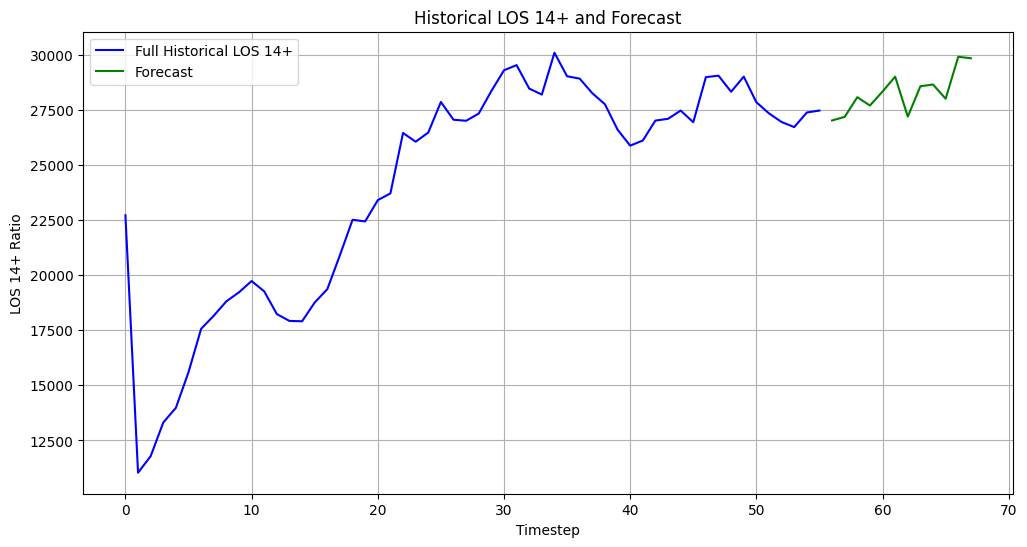

Data saved to los14.csv.


In [6]:

# Ensure correct extraction of LOS (14 or more days)
census_data = census_data.dropna(subset=["14 or more days"])
census_data['LOS_14_plus'] = census_data['14 or more days']

# Use correct historical data
historical_los_14_plus_data = census_data['LOS_14_plus'].values

# Prepare DataFrame for model
df = pd.DataFrame({
    'beds_available': census_data['G&A beds available'].values,
    'beds_occupied': census_data['G&A beds occupied'].values,
    'LOS_14_plus': census_data['LOS_14_plus'].values
})

# Debug: Check data distributions
print("Data Description:")
print(df.describe())

# Hyperparameters
lookback = 12
horizon = 12
input_dim = 2  # Features: beds_available and beds_occupied
hidden_size = 256
num_encoder_layers = 3
num_decoder_layers = 3
learning_rate = 0.001
batch_size = 32
epochs = 50

# Prepare Sequences
data = df[['beds_available', 'beds_occupied', 'LOS_14_plus']].values
feat_mean = data.mean(axis=0)
feat_std = data.std(axis=0)
scaled_data = (data - feat_mean) / feat_std

# Debug: Check scaling factors
print("Feature Mean:", feat_mean)
print("Feature Std Dev:", feat_std)

X_list, Cov_list, Y_list = [], [], []
num_samples = len(scaled_data)
for i in range(num_samples - lookback - horizon):
    past_inputs = scaled_data[i:i+lookback, 0:2]
    cov_window = scaled_data[i:i+lookback+horizon, 0:2]
    future_targets = scaled_data[i+lookback:i+lookback+horizon, 2]
    X_list.append(past_inputs)
    Cov_list.append(cov_window)
    Y_list.append(future_targets)

X = np.array(X_list)
Cov = np.array(Cov_list)
Y = np.array(Y_list)

X_train, X_temp, Cov_train, Cov_temp, Y_train, Y_temp = train_test_split(X, Cov, Y, test_size=0.3, random_state=42)
X_val, X_test, Cov_val, Cov_test, Y_val, Y_test = train_test_split(X_temp, Cov_temp, Y_temp, test_size=0.5, random_state=42)

# Build TiDE Model
inputs = tf.keras.Input(shape=(lookback, input_dim), name='historical_inputs')
covariates = tf.keras.Input(shape=(lookback + horizon, input_dim), name='covariates')

projected_covariates = tf.keras.layers.Dense(hidden_size, activation='relu')(covariates)
flattened_inputs = tf.keras.layers.Flatten()(inputs)
sliced_covariates = tf.keras.layers.Lambda(lambda x: x[:, :lookback, :])(projected_covariates)
flattened_past_covariates = tf.keras.layers.Flatten()(sliced_covariates)
combined_inputs = tf.keras.layers.Concatenate(axis=-1)([flattened_inputs, flattened_past_covariates])

# Encoder
encoding = combined_inputs
for _ in range(num_encoder_layers):
    encoding = tf.keras.layers.Dense(hidden_size, activation='relu')(encoding)

# Decoder
for _ in range(num_decoder_layers):
    encoding = tf.keras.layers.Dense(hidden_size, activation='relu')(encoding)

# Reshape for horizon
decoded = tf.keras.layers.Dense(horizon * hidden_size)(encoding)
decoded = tf.keras.layers.Reshape((horizon, hidden_size))(decoded)

# Temporal Decoder
outputs = []
future_covariate_projection = tf.keras.layers.Dense(hidden_size)
for t in range(horizon):
    future_covariate = future_covariate_projection(projected_covariates[:, lookback + t, :])
    highway_input = tf.keras.layers.Concatenate(axis=-1)([decoded[:, t], future_covariate])
    single_output = tf.keras.layers.Dense(1)(highway_input)
    outputs.append(single_output)

outputs = tf.keras.layers.Concatenate(axis=-1)(outputs)
global_residual = tf.keras.layers.Dense(horizon)(flattened_inputs)
final_output = outputs + global_residual

model = tf.keras.Model(inputs=[inputs, covariates], outputs=final_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train TiDE Model
history = model.fit(
    [X_train, Cov_train], Y_train,
    validation_data=([X_val, Cov_val], Y_val),
    epochs=epochs,
    batch_size=batch_size
)

# Forecast and Rescale
forecast = model.predict([X_test, Cov_test])
forecast_original = forecast * feat_std[2] + feat_mean[2]

# Debug: Compare predictions and actuals
print("Y_test (original scale):", (Y_test * feat_std[2] + feat_mean[2]).flatten())
print("Forecast (original scale):", forecast_original.flatten())

# Adjust the length of historical data
historical_los_14_plus = historical_los_14_plus_data
full_historical_timestamps = np.arange(len(historical_los_14_plus))
forecast_timestamps = np.arange(len(historical_los_14_plus), len(historical_los_14_plus) + horizon)

print("Full Historical LOS 14+:", historical_los_14_plus.flatten())
print("Forecast:", forecast_original.flatten())

plt.figure(figsize=(12, 6))
plt.plot(full_historical_timestamps, historical_los_14_plus.flatten(), label="Full Historical LOS 14+", color="blue")
plt.plot(forecast_timestamps, forecast_original[0], label="Forecast", color="green")
plt.xlabel("Timestep")
plt.ylabel("LOS 14+ Ratio")
plt.title("Historical LOS 14+ and Forecast")
plt.legend()
plt.grid()
plt.show()
# LOS 14+
# Combine historical and forecast data
historical_length = len(historical_los_14_plus)  # Historical data length
forecast_length = len(forecast_original.flatten())  # Forecast data length

# Create labels for historical and forecast
labels = ['Historical'] * historical_length + ['Forecast'] * forecast_length

# Create a DataFrame for both historical and forecast data
combined_data = pd.DataFrame({
    'Timestep': list(range(1, historical_length + forecast_length + 1)),  # Timestep from 1 to total
    'Type': labels,  # Label whether it is Historical or Forecast
    'Value': list(historical_los_14_plus.flatten()) + list(forecast_original.flatten())  # Combined values
})

# Drop rows where Timestep > 72
combined_data = combined_data[combined_data['Timestep'] <= 72]

# Save to CSV
csv_file_path = 'los14.csv'
combined_data.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}.")



Data Description:
       beds_available  beds_occupied   LOS_21_plus
count       56.000000      56.000000     56.000000
mean     95507.330012   85806.975634  15417.178571
std       3909.289853    9304.663842   3810.774310
min      88917.000000   52997.700000   6695.000000
25%      91669.250000   80255.500000  11595.500000
50%      96525.000000   89474.500000  17330.500000
75%      98793.000000   91887.500000  18274.000000
max     101642.000000   95776.000000  19824.000000
Feature Mean: [95507.33001152 85806.97563364 15417.17857143]
Feature Std Dev: [3874.22824947 9221.21225591 3776.59627134]
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 1.2709 - val_loss: 1.1602
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 1.0659 - val_loss: 0.8109
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.6586 - val_loss: 0.7439
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4283 - val_loss: 0.6774
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 0.3354 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step
Y_test (original scale): [17155. 18078. 17835. 17670. 17846. 18846. 19824. 19715. 18965. 18417.
 19500. 19028. 17670. 17846. 18846. 19824. 19715. 18965. 18417. 19500.
 19028. 18972. 18840. 18274. 14935. 17270. 16954. 17155. 18078. 17835.
 17670. 17846. 18846. 19824. 19715. 18965. 16988. 17685. 17675. 17826.
 17367. 18884. 18896. 18531. 19269. 18274. 17952. 17573. 18840. 18274.
 17294. 16852. 16988. 17685. 17675. 17826. 17367. 18884. 18896. 18531.]
Forecast (original scale): [17239.705 17300.184 18764.254 17673.549 18716.984 18093.44  18351.139
 18849.574 18573.773 19080.494 19132.379 19630.752 17576.566 18277.457
 18307.51  18693.693 18743.04  18510.98  19823.758 19486.383 18904.
 18731.664 18512.518 18400.408 15434.757 15810.977 16710.805 17673.154
 17331.582 18332.398 18157.16  18533.172 18679.371 19044.307 19370.73
 17683.969 16502.7   17143.59  17465.994 17718.037 18981.318 18409.71
 19637.879 18029.533 17995.32  18629.652 18515.06  17374.572 

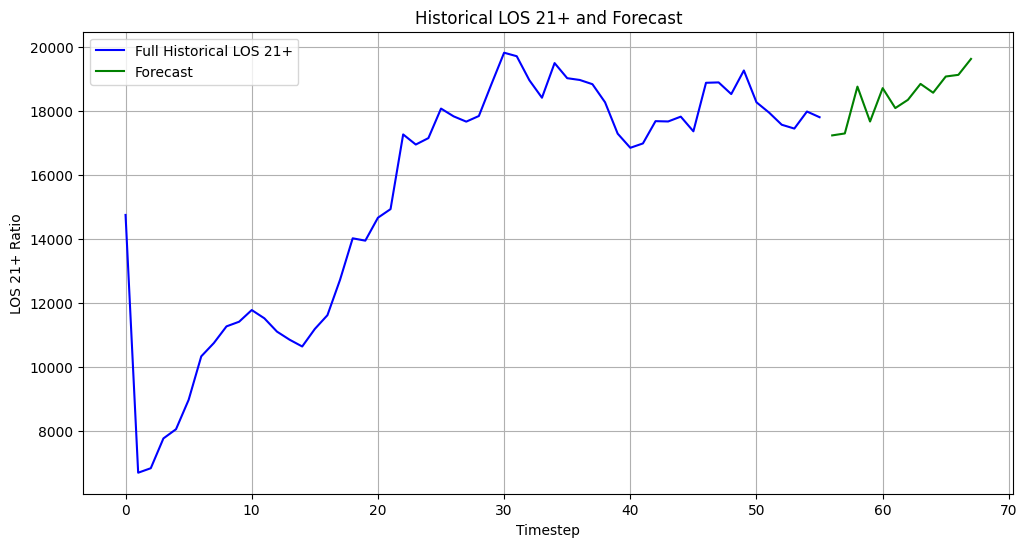

Data saved to los21.csv.


In [7]:
# Ensure correct extraction of LOS (21 or more days)
census_data = census_data.dropna(subset=["21 or more days"])
census_data['LOS_21_plus'] = census_data['21 or more days']

# Use correct historical data
historical_los_21_plus_data = census_data['LOS_21_plus'].values

# Prepare DataFrame for model
df = pd.DataFrame({
    'beds_available': census_data['G&A beds available'].values,
    'beds_occupied': census_data['G&A beds occupied'].values,
    'LOS_21_plus': census_data['LOS_21_plus'].values
})

# Debug: Check data distributions
print("Data Description:")
print(df.describe())

# Hyperparameters
lookback = 12
horizon = 12
input_dim = 2  # Features: beds_available and beds_occupied
hidden_size = 256
num_encoder_layers = 3
num_decoder_layers = 3
learning_rate = 0.001
batch_size = 32
epochs = 50

# Prepare Sequences
data = df[['beds_available', 'beds_occupied', 'LOS_21_plus']].values
feat_mean = data.mean(axis=0)
feat_std = data.std(axis=0)
scaled_data = (data - feat_mean) / feat_std

# Debug: Check scaling factors
print("Feature Mean:", feat_mean)
print("Feature Std Dev:", feat_std)

X_list, Cov_list, Y_list = [], [], []
num_samples = len(scaled_data)
for i in range(num_samples - lookback - horizon):
    past_inputs = scaled_data[i:i+lookback, 0:2]
    cov_window = scaled_data[i:i+lookback+horizon, 0:2]
    future_targets = scaled_data[i+lookback:i+lookback+horizon, 2]
    X_list.append(past_inputs)
    Cov_list.append(cov_window)
    Y_list.append(future_targets)

X = np.array(X_list)
Cov = np.array(Cov_list)
Y = np.array(Y_list)

X_train, X_temp, Cov_train, Cov_temp, Y_train, Y_temp = train_test_split(X, Cov, Y, test_size=0.3, random_state=42)
X_val, X_test, Cov_val, Cov_test, Y_val, Y_test = train_test_split(X_temp, Cov_temp, Y_temp, test_size=0.5, random_state=42)

# Build TiDE Model
inputs = tf.keras.Input(shape=(lookback, input_dim), name='historical_inputs')
covariates = tf.keras.Input(shape=(lookback + horizon, input_dim), name='covariates')

projected_covariates = tf.keras.layers.Dense(hidden_size, activation='relu')(covariates)
flattened_inputs = tf.keras.layers.Flatten()(inputs)
sliced_covariates = tf.keras.layers.Lambda(lambda x: x[:, :lookback, :])(projected_covariates)
flattened_past_covariates = tf.keras.layers.Flatten()(sliced_covariates)
combined_inputs = tf.keras.layers.Concatenate(axis=-1)([flattened_inputs, flattened_past_covariates])

# Encoder
encoding = combined_inputs
for _ in range(num_encoder_layers):
    encoding = tf.keras.layers.Dense(hidden_size, activation='relu')(encoding)

# Decoder
for _ in range(num_decoder_layers):
    encoding = tf.keras.layers.Dense(hidden_size, activation='relu')(encoding)

# Reshape for horizon
decoded = tf.keras.layers.Dense(horizon * hidden_size)(encoding)
decoded = tf.keras.layers.Reshape((horizon, hidden_size))(decoded)

# Temporal Decoder
outputs = []
future_covariate_projection = tf.keras.layers.Dense(hidden_size)
for t in range(horizon):
    future_covariate = future_covariate_projection(projected_covariates[:, lookback + t, :])
    highway_input = tf.keras.layers.Concatenate(axis=-1)([decoded[:, t], future_covariate])
    single_output = tf.keras.layers.Dense(1)(highway_input)
    outputs.append(single_output)

outputs = tf.keras.layers.Concatenate(axis=-1)(outputs)
global_residual = tf.keras.layers.Dense(horizon)(flattened_inputs)
final_output = outputs + global_residual

model = tf.keras.Model(inputs=[inputs, covariates], outputs=final_output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mse')

# Train TiDE Model
history = model.fit(
    [X_train, Cov_train], Y_train,
    validation_data=([X_val, Cov_val], Y_val),
    epochs=epochs,
    batch_size=batch_size
)

# Forecast and Rescale
forecast = model.predict([X_test, Cov_test])
forecast_original = forecast * feat_std[2] + feat_mean[2]

# Debug: Compare predictions and actuals
print("Y_test (original scale):", (Y_test * feat_std[2] + feat_mean[2]).flatten())
print("Forecast (original scale):", forecast_original.flatten())

# Adjust the length of historical data
historical_los_21_plus = historical_los_21_plus_data
full_historical_timestamps = np.arange(len(historical_los_21_plus))
forecast_timestamps = np.arange(len(historical_los_21_plus), len(historical_los_21_plus) + horizon)

print("Full Historical LOS 21+:", historical_los_21_plus.flatten())
print("Forecast:", forecast_original.flatten())

plt.figure(figsize=(12, 6))
plt.plot(full_historical_timestamps, historical_los_21_plus.flatten(), label="Full Historical LOS 21+", color="blue")
plt.plot(forecast_timestamps, forecast_original[0], label="Forecast", color="green")
plt.xlabel("Timestep")
plt.ylabel("LOS 21+ Ratio")
plt.title("Historical LOS 21+ and Forecast")
plt.legend()
plt.grid()
plt.show()
# Combine historical and forecast data
historical_length = len(historical_los_21_plus)  # Historical data length
forecast_length = len(forecast_original.flatten())  # Forecast data length

# Create labels for historical and forecast
labels = ['Historical'] * historical_length + ['Forecast'] * forecast_length

# Create a DataFrame for both historical and forecast data
combined_data = pd.DataFrame({
    'Timestep': list(range(1, historical_length + forecast_length + 1)),  # Timestep from 1 to total
    'Type': labels,  # Label whether it is Historical or Forecast
    'Value': list(historical_los_21_plus.flatten()) + list(forecast_original.flatten())  # Combined values
})

# Drop rows where Timestep > 72
combined_data = combined_data[combined_data['Timestep'] <= 72]

# Save to CSV
csv_file_path = 'los21.csv'
combined_data.to_csv(csv_file_path, index=False)

print(f"Data saved to {csv_file_path}.")

